## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Set the style for matplotlib plots
plt.style.use('seaborn')

# Define ANSI escape codes for text color
class Color:
    HEADER = '\033[1;30m'  # Bold Black
    OKBLUE = '\033[94m'    # Blue
    OKGREEN = '\033[92m'   # Green
    WARNING = '\033[93m'   # Yellow
    FAIL = '\033[91m'      # Red
    ENDC = '\033[0m'       # Reset to default color

## Data Loading and Overview 

In [2]:
# Data Loading and Overview 
df = pd.read_csv('customer_train.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0
1679,1679,1679,8230,1980,S1,Menikah,33228000.0,1,0,23-01-2014,...,7,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis (EDA)

In [4]:
print(f"{Color.HEADER}Columns in Data:{Color.ENDC}\n", df.columns)
print(f"\n{Color.HEADER}Total rows and columns in Data:{Color.ENDC}\n", df.shape)

Columns in Data:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

Total rows and columns in Data:
 (1680, 31)


In [5]:
#removing unwanted column which is not required for ML model
df = df.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0', 'ID'], axis=1,)

In [6]:
# Define a values in the 'Marital_Status' to an appropriate English equivalent

marital_status_mapping = {
    'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widowed(female)',
    'duda': 'Widowed (male)'}

# Replace the values in the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

In [7]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
# Create a new column 'year' and set it to the current year, 2023.
df['year'] = 2023

# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the year and create a new column 'Year_Customer'
df['Year_Customer'] = df['Dt_Customer'].dt.year

# Calculate customer age by subtracting 'Year_Birth' from the current year and store it in a new column 'Customer_Age'.
df['Customer_Age'] = df['year'] - df['Year_Birth']

# Calculate customer tenure by subtracting 'Year_Customer' from the current year and store it in a new column 'customer_tenure'.
df['customer_tenure'] = df['year'] - df['Year_Customer']

# Drop columns 'Year_Birth' and 'year' from the DataFrame.
df.drop(columns=['Year_Birth', 'year', 'Year_Customer','Dt_Customer' ], axis=1, inplace=True)

C:\Users\riswa\AppData\Local\Temp\ipykernel_9272\1215022636.py:5: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\riswa\AppData\Local\Temp\ipykernel_9272\1215022636.py:5: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\riswa\AppData\Local\Temp\ipykernel_9272\1215022636.py:5: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\riswa\AppData\Local\Temp\ipykernel_9272\1215022636.py:5: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime

In [9]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,3,11,1,66,11
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,3,11,0,69,9
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,3,11,0,58,10
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,3,11,0,39,9
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,3,11,0,42,9


In [10]:
# Summary of the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1680 non-null   object 
 1   Marital_Status       1680 non-null   object 
 2   Income               1663 non-null   float64
 3   Kidhome              1680 non-null   int64  
 4   Teenhome             1680 non-null   int64  
 5   Recency              1680 non-null   int64  
 6   MntCoke              1680 non-null   int64  
 7   MntFruits            1680 non-null   int64  
 8   MntMeatProducts      1680 non-null   int64  
 9   MntFishProducts      1680 non-null   int64  
 10  MntSweetProducts     1680 non-null   int64  
 11  MntGoldProds         1680 non-null   int64  
 12  NumDealsPurchases    1680 non-null   int64  
 13  NumWebPurchases      1680 non-null   int64  
 14  NumCatalogPurchases  1680 non-null   int64  
 15  NumStorePurchases    1680 non-null   i

In [11]:
# Find the missing values in each columns 
df.isnull().sum()

Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Customer_Age            0
customer_tenure         0
dtype: int64

In [12]:
# # Fill missing values in the 'Income' column with the median income value.
df["Income"].fillna(df["Income"].median(), inplace=True)

In [13]:
# Checking again if missing values still present
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_Age           0
customer_tenure        0
dtype: int64

In [14]:
# Summary statistics.
df.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
count,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000,1680.000000,1680.000000
mean,5.200661e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,27016.666667,43339.880952,...,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048,54.152381,9.975000
std,2.137358e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,41529.595304,51363.336472,...,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243,12.027192,0.681129
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,9.000000
25%,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,10.000000
50%,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,10.000000
75%,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,32000.000000,54250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,10.000000
max,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,11.000000


# Data visualization

C:\Users\riswa\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\riswa\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


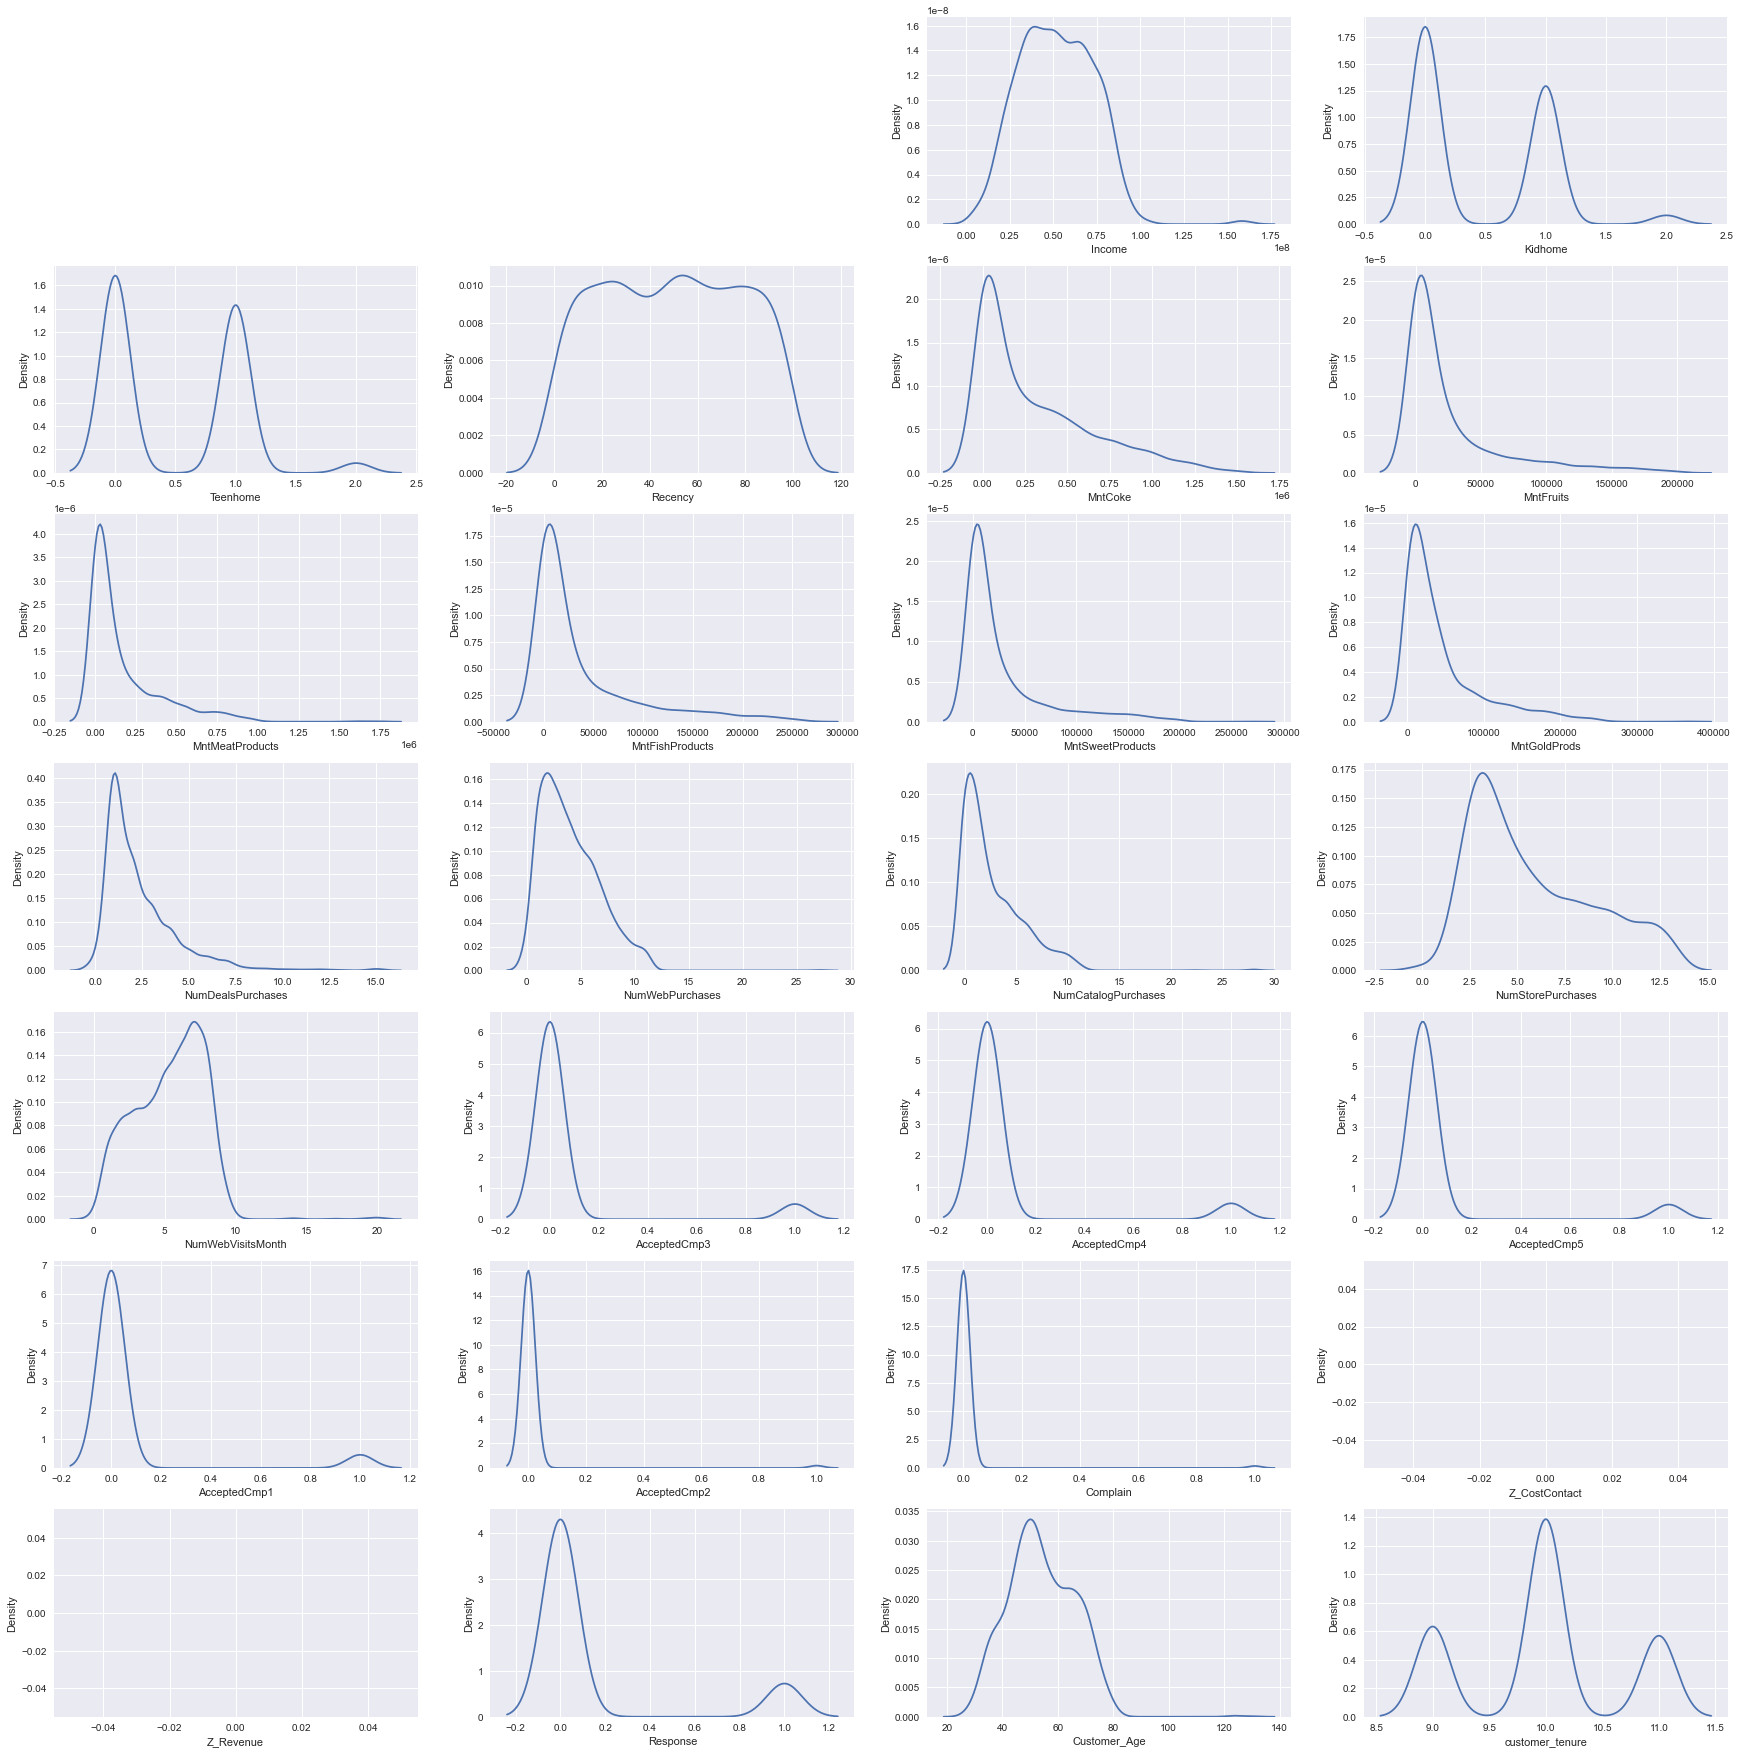

In [15]:
# Create a figure with a specified size (20 units wide and 10 units tall).
plt.figure(figsize=(30, 45))

# Loop through each column in the DataFrame.
for i, col in enumerate(df.columns):
    # Check if the column's data type is not 'object' (i.e., numeric).
    if df[col].dtype != 'object':
        # Create a subplot in a 6x4 grid layout and position it using 'i + 1'.
        ax = plt.subplot(10, 4, i + 1)
        
        # Plot the Kernel Density Estimate (KDE) for the current column.
        sns.kdeplot(df[col], ax=ax)
        
        # Set the x-axis label to the column name.
        plt.xlabel(col)

# Display the entire figure with subplots.
plt.show()

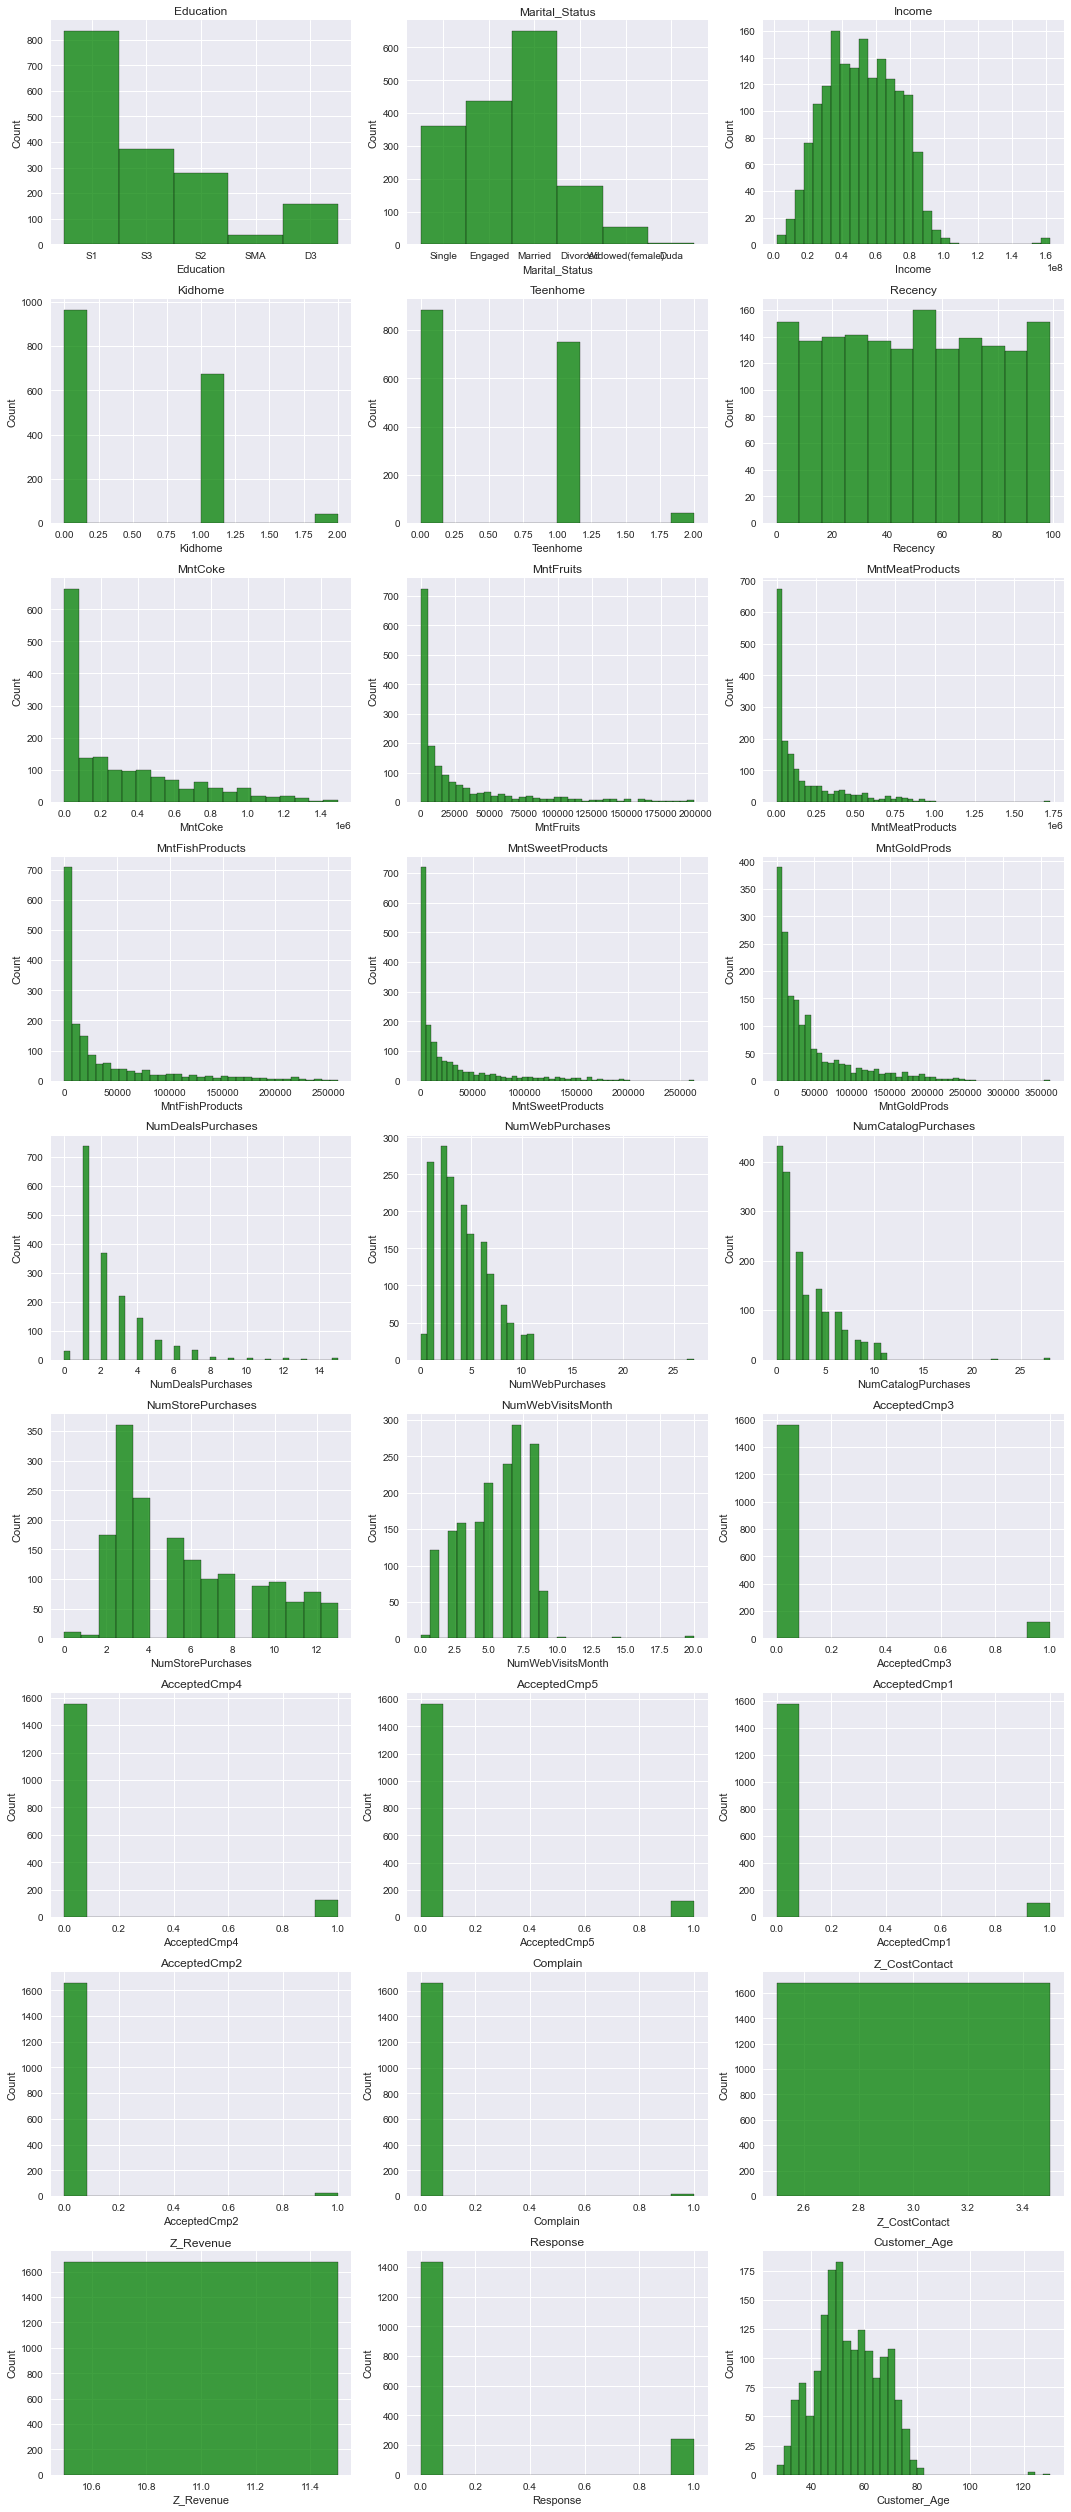

In [16]:
# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of subplots per line
n_rows = (27 + 1) // n_columns  # Calculate the number of lines

plt.figure(figsize=(15, 35))  # Adjust the figure size as needed

for i in range(0, 27):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(df[df.columns[i]], kde_kws={'color': 'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, color='g')
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

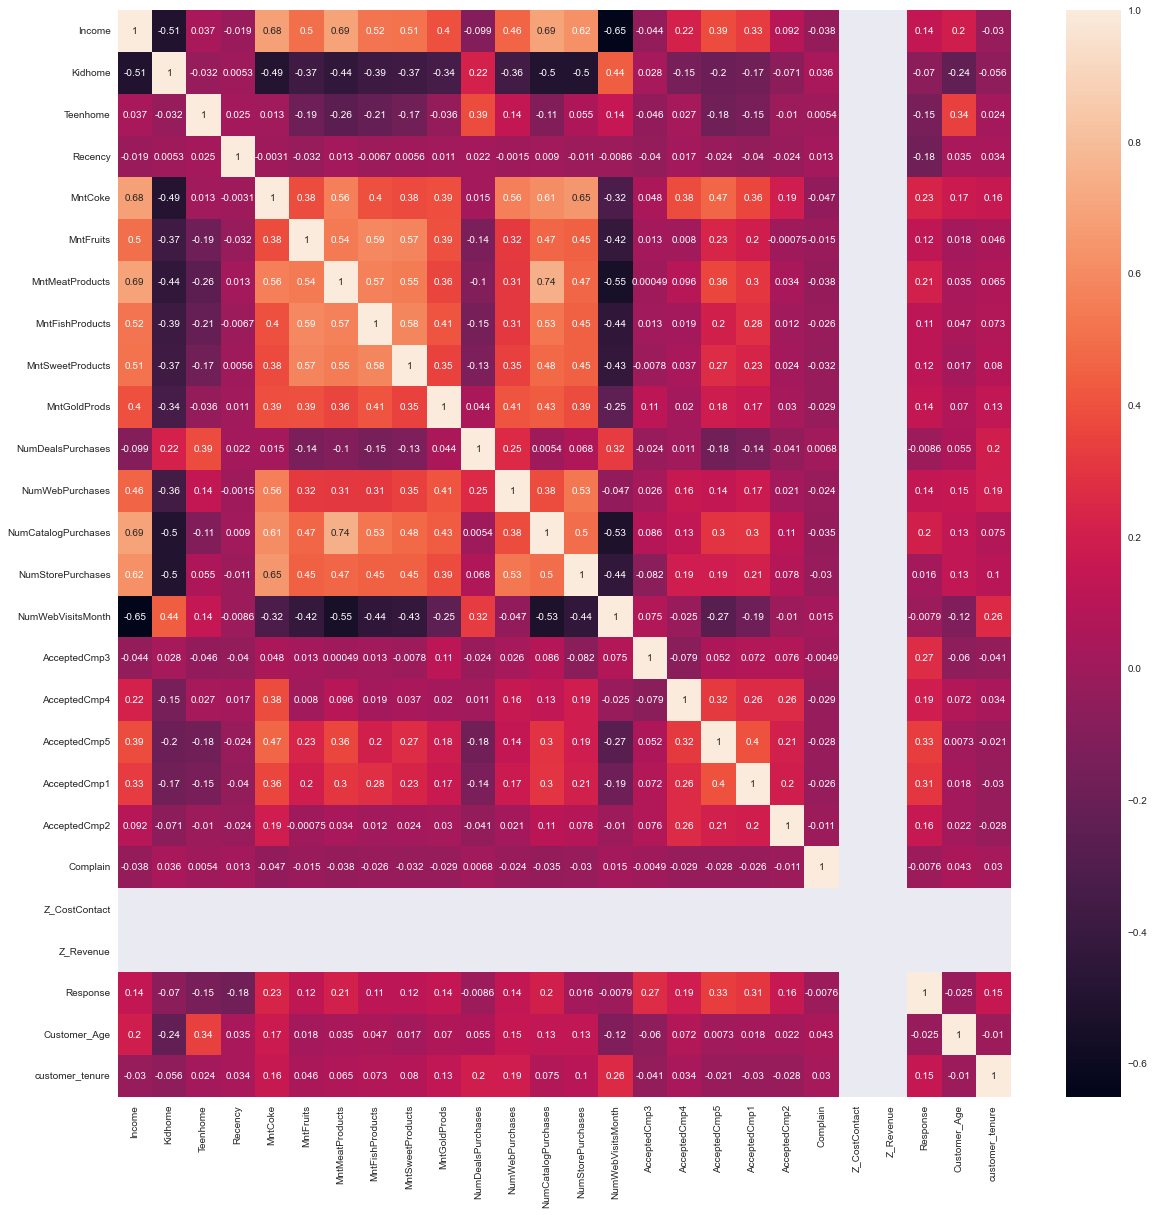

In [17]:
plt.figure(figsize =(20,20))
           
sns.heatmap(df.corr(), annot=True)
           
plt.show()

# Findin outliers and removing

C:\Users\riswa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

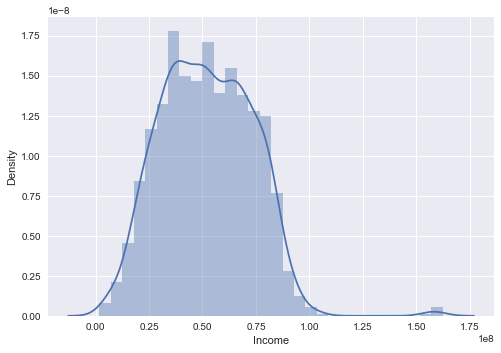

In [18]:
sns.distplot(df['Income'])

C:\Users\riswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

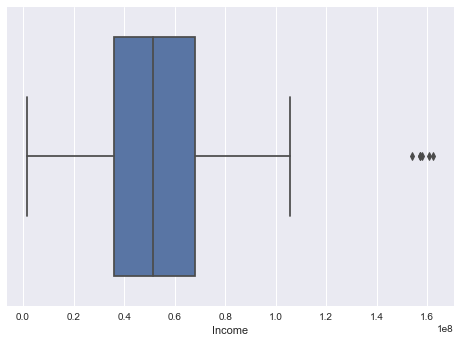

In [19]:
sns.boxplot(df['Income'])

## Z-Score method

## Z	=	standard score,  X	=	observed value,
## M	=	mean of the sample,  Std	=	standard deviation of the sample

## Z = X - M / Std

In [20]:
upper_limit = df['Income'].mean() + 3*df['Income'].std()
lower_limit = df['Income'].mean() - 3*df['Income'].std()

print('upper_limit:', upper_limit )
print('lower_limit:', lower_limit)

upper_limit: 116127356.1236628
lower_limit: -12114138.266519956


In [21]:
# Find Outlier
Z_outlier = df.loc[(df['Income']>=upper_limit) | (df['Income']<= lower_limit )]
Z_outlier

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
164,S3,Married,157243000.0,0,1,98,20000,2000,1582000,1000,...,0,0,0,0,0,3,11,0,50,9
617,S3,Engaged,162397000.0,1,1,31,85000,1000,16000,2000,...,0,0,0,0,0,3,11,0,47,10
655,S1,Divorced,153924000.0,0,0,81,1000,1000,1000,1000,...,0,0,0,0,0,3,11,0,48,9
687,S3,Married,160803000.0,0,0,21,55000,16000,1622000,17000,...,0,0,0,0,0,3,11,0,41,11
1300,S2,Engaged,157733000.0,1,0,37,39000,1000,9000,2000,...,0,0,0,0,0,3,11,0,52,10
1653,S1,Engaged,157146000.0,0,0,13,1000,0,1725000,2000,...,0,0,0,0,0,3,11,0,46,10


In [22]:
# Data Without Outliers
df_without_outlier = df.loc[(df['Income']<=upper_limit) & (df['Income']>= lower_limit )]
new_df = df_without_outlier
new_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,3,11,1,66,11
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,3,11,0,69,9
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,3,11,0,58,10
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,3,11,0,39,9
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,3,11,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,D3,Engaged,20193000.0,0,0,18,8000,8000,22000,24000,...,0,0,0,0,0,3,11,0,32,11
1676,S1,Married,27573000.0,1,0,45,50000,15000,110000,39000,...,0,0,0,0,0,3,11,0,48,10
1677,SMA,Single,15862000.0,1,0,26,1000,1000,4000,11000,...,0,0,0,0,0,3,11,0,44,10
1678,S3,Married,49544000.0,1,0,0,308000,0,73000,0,...,0,0,0,0,0,3,11,0,47,10


In [23]:
# Old Data and New Data

print(f"{Color.HEADER}Old Data with Outlier:{Color.ENDC}{len(df)}")
print(f"{Color.HEADER}New Data without Outlier:{Color.ENDC}{len(df_without_outlier)}")
print (f"{Color.HEADER}Total Outliers:{Color.ENDC}{len(Z_outlier)}")

Old Data with Outlier:1680
New Data without Outlier:1674
Total Outliers:6


C:\Users\riswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

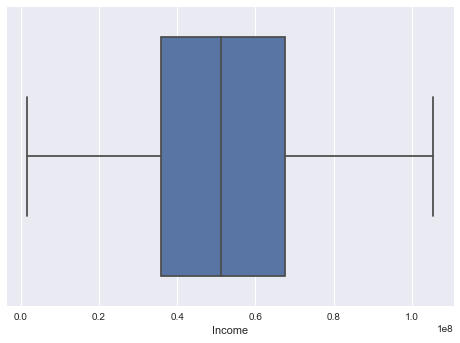

In [24]:
sns.boxplot(df_without_outlier['Income'])

C:\Users\riswa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

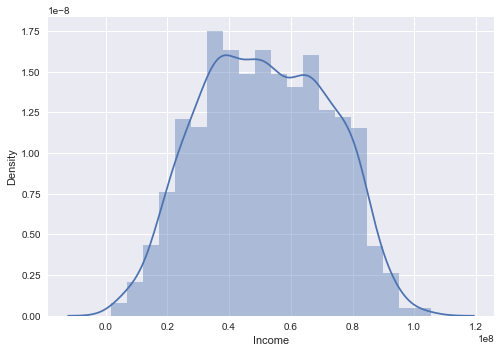

In [25]:
sns.distplot(new_df['Income'])

In [26]:
new_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,3,11,1,66,11
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,3,11,0,69,9
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,3,11,0,58,10
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,3,11,0,39,9
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,3,11,0,42,9


In [27]:
new_df.shape

(1674, 28)

In [28]:
new_df.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Customer_Age             int64
customer_tenure          int64
dtype: object

In [29]:
new_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Customer_Age', 'customer_tenure'],
      dtype='object')

## Scaling the DataFrame

In [30]:
# Select only the numeric columns for scaling
numeric_columns = new_df.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric data
scaled_df = scaler.fit_transform(numeric_columns)

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_df, columns=numeric_columns.columns)

## Hyperparameter tuning 
## Finding 'k' value by Elbow Method

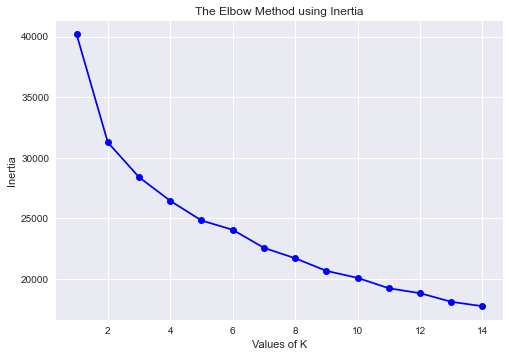

In [31]:
inertia = []

range_val = range(1, 15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
    
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

# Model Building using KMeans

In [39]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [40]:
#Dimensionality reduction 
#Converting the DataFrame into 2D DataFrame for visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])

pca_df

,PCA1,PCA2
0,3.893347,0.445263
1,-2.385234,-0.303348
2,1.750252,0.028187
3,-2.634758,-1.655259
4,-0.433544,-0.312263
...,...,...
1669,-1.807072,-1.625824
1670,-1.938120,-0.058091
1671,-3.065645,-1.470545
1672,-1.246083,-0.135602


## Visualizing the clustered dataframe

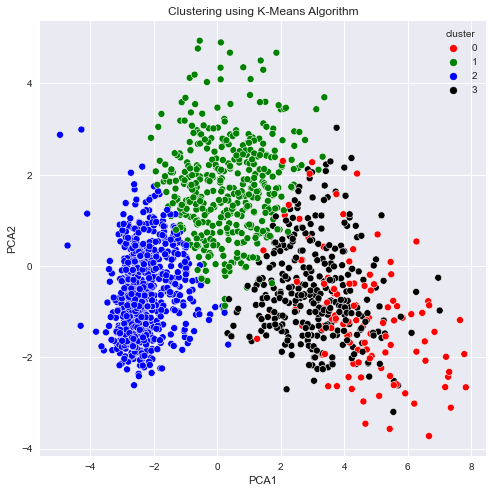

In [41]:
plt.figure(figsize=(8,8))

ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])

plt.title("Clustering using K-Means Algorithm")

plt.show()